In [8]:
import pandas as pd
import numpy as np
import os

In [9]:
file_name = 'laptops.csv'

In [10]:
if os.path.exists(file_name):
    pass
else:
    !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

In [11]:
df = pd.read_csv('laptops.csv')
df.head(5)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [12]:
len(df)

2160

In [13]:
df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [15]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [16]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [17]:
df2 = df[['ram','storage','screen','final_price']]
df2

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


### EDA

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

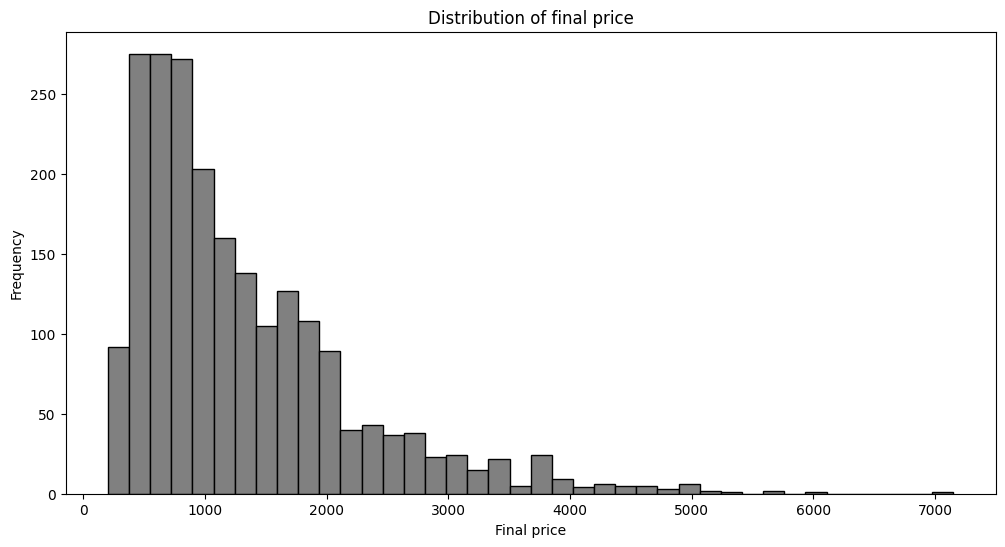

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(df2.final_price, bins=40, color='grey',alpha = 1)
plt.xlabel("Final price")
plt.ylabel("Frequency")
plt.title("Distribution of final price")
plt.show()

In [20]:
#Question 1
df2.columns[df2.isnull().sum() > 0]

Index(['screen'], dtype='object')

In [21]:
#Question2 
df2.ram.median()

16.0

In [22]:
np.random.seed = 42

n  = len(df2)
n_val = int(n * .2)
n_test = int(n * .2)
n_train = n - (n_test + n_val)

#Shuffle dataset

idx = np.arange(n) 
np.random.shuffle(idx)
df_shuffled = df2.iloc[idx]

df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [24]:
df_train

,ram,storage,screen
0,16,512,16.0
1,16,1000,13.4
2,8,256,14.0
3,16,512,16.0
4,8,512,15.6
...,...,...,...
1291,8,256,15.6
1292,16,512,15.6
1293,16,1000,13.5
1294,8,256,14.0


In [25]:
#Question 3
df_train.isnull().sum()

ram        0
storage    0
screen     2
dtype: int64

In [26]:
#Fill missing with mean
mean_screen = round(df['screen'].mean(),1)
df_train_mean_fill = df_train.fillna(mean_screen).copy()
df_train_mean_fill.isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [27]:
#Fill missing with 0
df_train_zero_fill = df_train.fillna(0).copy()
df_train_zero_fill.isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [28]:
#Linear regression without regularization
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [29]:
df_train_mean_fill

,ram,storage,screen
0,16,512,16.0
1,16,1000,13.4
2,8,256,14.0
3,16,512,16.0
4,8,512,15.6
...,...,...,...
1291,8,256,15.6
1292,16,512,15.6
1293,16,1000,13.5
1294,8,256,14.0


In [30]:
X_train = df_train_mean_fill
w_0, w = train_linear_regression(X_train,y_train)

In [31]:
w_0

6.740202879822817

In [32]:
w

array([ 0.02759145,  0.00070976, -0.04090567])

In [33]:
y_pred = w_0 + X_train.dot(w)
y_pred

0       6.890571
1       7.343288
2       6.569953
3       6.890571
4       6.686202
          ...   
1291    6.504504
1292    6.906934
1293    7.339197
1294    6.569953
1295    7.678396
Length: 1296, dtype: float64

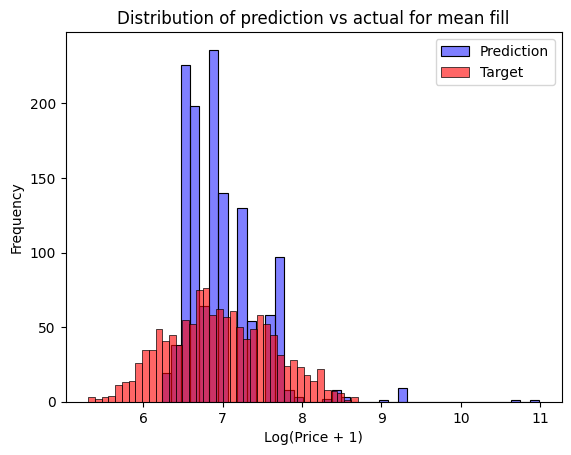

In [34]:
sns.histplot(y_pred,bins=40,label='Prediction',color='Blue',alpha=0.5)
sns.histplot(y_train,bins=40,label='Target',color='Red',alpha=0.6)
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Distribution of prediction vs actual for mean fill')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import root_mean_squared_error as rmse

mean_fill_rmse = rmse(y_train,y_pred)
print(f'rmse of mean fill values:{round(mean_fill_rmse,2)}')

rmse of mean fill values:0.43


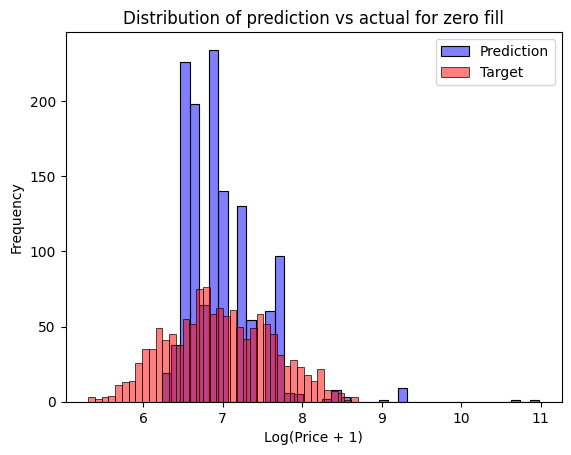

In [36]:
X_train = df_train_zero_fill
w_0, w = train_linear_regression(X_train,y_train)
y_pred = w_0 + X_train.dot(w)
sns.histplot(y_pred,bins=40,label='Prediction',color='Blue',alpha=0.5)
sns.histplot(y_train,bins=40,label='Target',color='Red',alpha=0.5)
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Distribution of prediction vs actual for zero fill')
plt.legend()
plt.show()

In [37]:
zero_fill_rmse = rmse(y_train,y_pred)
print(f'rmse of zero fill values:{round(zero_fill_rmse,2)}')

rmse of zero fill values:0.43


In [38]:
def prediction_viz(prediction,target,x_label,plot_title, color1 = 'Blue', color2 = 'Red'):
    sns.histplot(prediction,bins=40,label='Prediction',color= color1,alpha=0.5)
    sns.histplot(target,bins=40,label='Target',color=color2,alpha=0.6)
    plt.xlabel(f'{x_label}')
    plt.ylabel('Frequency')
    plt.title(f'{plot_title}')
    plt.legend()
    return plt.show()

In [39]:
df_val.isnull().sum()

ram        0
storage    0
screen     1
dtype: int64

In [40]:
X_val = df_val.fillna(0).copy()
y_pred = w_0 + X_val.dot(w)
print('validation',round(rmse(y_val,y_pred),2))

validation 0.43


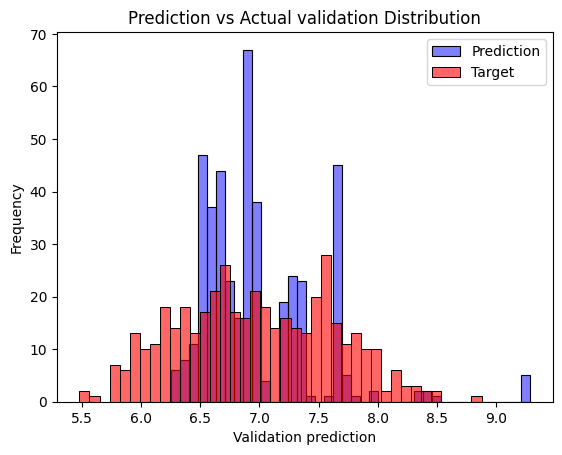

In [41]:
prediction_viz(y_pred,y_val,'Validation prediction', 'Prediction vs Actual validation Distribution')

In [42]:
#Question 4

X_train = df_train_zero_fill

In [43]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [44]:
from tqdm import tqdm,tqdm_gui

  0%|          | 0/7 [00:00<?, ?it/s]

The rmse value is: 0.432157 with the r value being 0


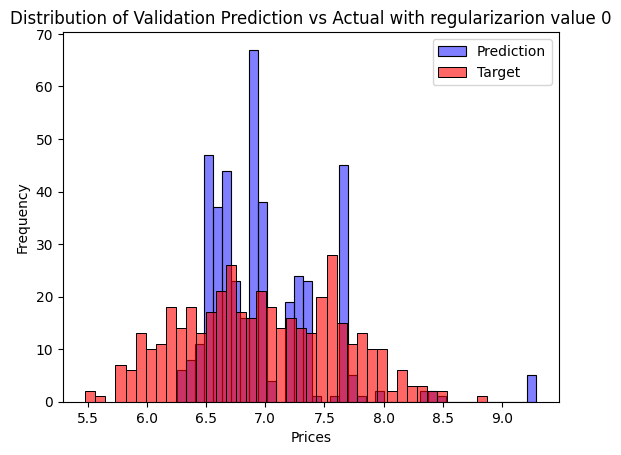

 14%|█▍        | 1/7 [00:00<00:00,  6.53it/s]

The rmse value is: 0.43216 with the r value being 0.01


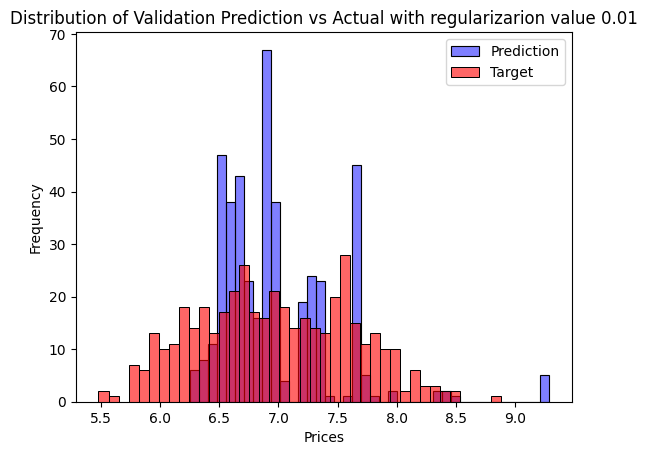

 29%|██▊       | 2/7 [00:00<00:00,  6.23it/s]

The rmse value is: 0.432235 with the r value being 0.1


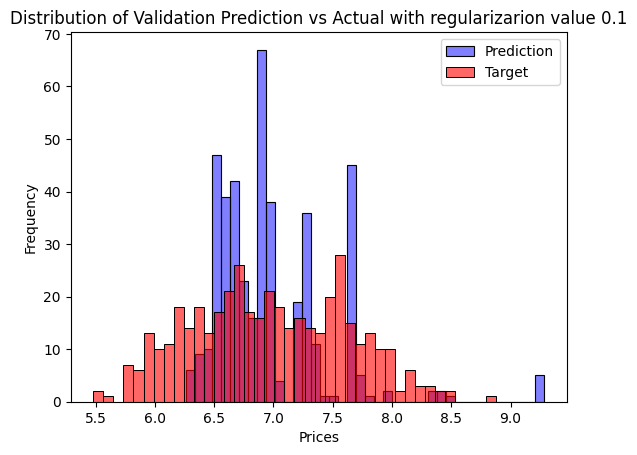

 43%|████▎     | 3/7 [00:00<00:00,  6.22it/s]

The rmse value is: 0.436613 with the r value being 1


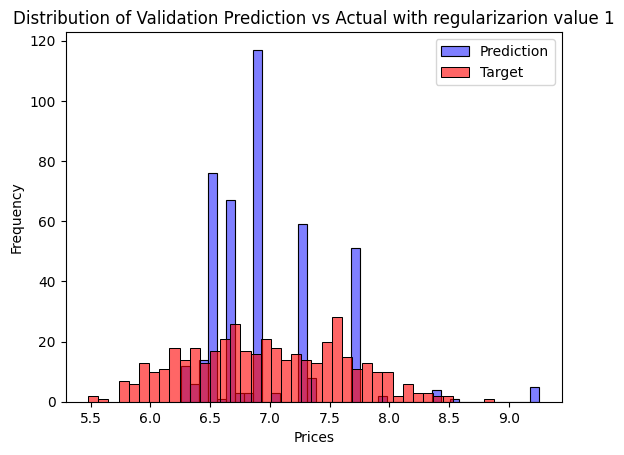

 57%|█████▋    | 4/7 [00:00<00:00,  6.35it/s]

The rmse value is: 0.485274 with the r value being 5


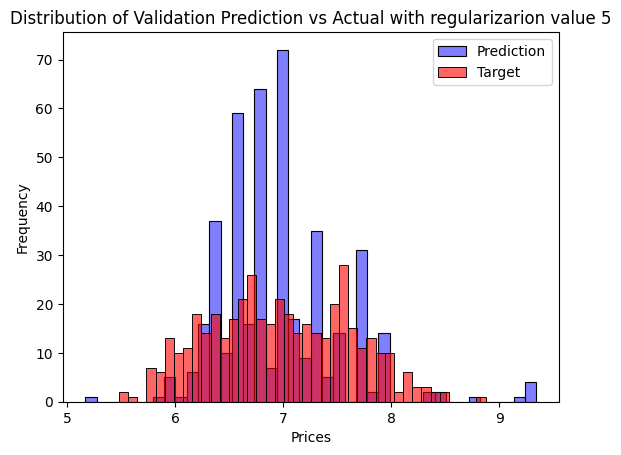

 71%|███████▏  | 5/7 [00:00<00:00,  6.47it/s]

The rmse value is: 0.542229 with the r value being 10


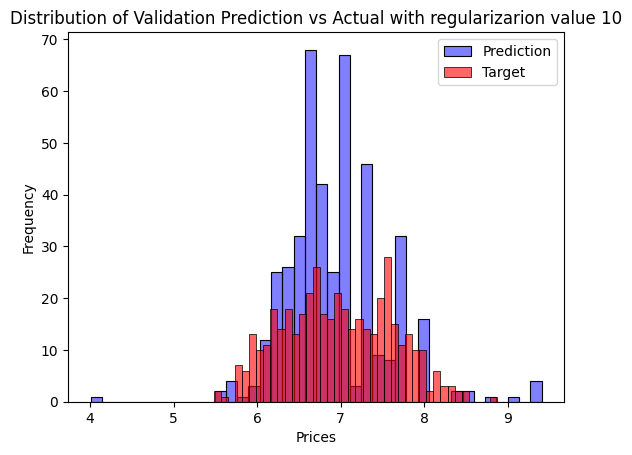

 86%|████████▌ | 6/7 [00:00<00:00,  6.48it/s]

The rmse value is: 0.72507 with the r value being 100


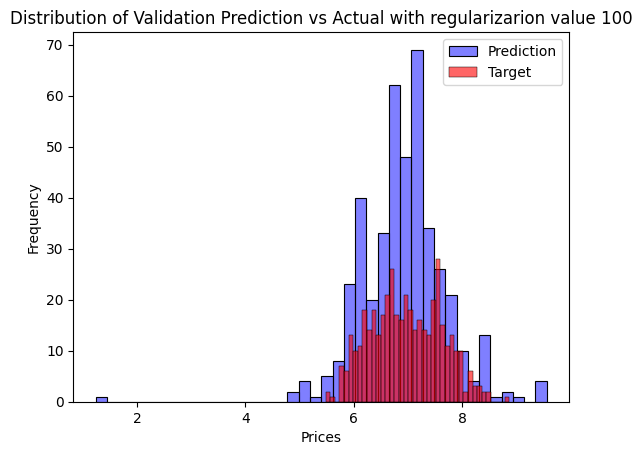

100%|██████████| 7/7 [00:01<00:00,  6.49it/s]


{0: 0.432157,
 0.01: 0.43216,
 0.1: 0.432235,
 1: 0.436613,
 5: 0.485274,
 10: 0.542229,
 100: 0.72507}

In [45]:
#Regularization
reg_dict = {}
for r in tqdm([0, 0.01, 0.1, 1, 5, 10, 100]):
    w_0,w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    reg_dict[r] = round(rmse(y_pred,y_val),6)
    print(f'The rmse value is: {round(rmse(y_pred,y_val),6)} with the r value being {r}' )
    prediction_viz(y_pred,y_val,'Prices', f'Distribution of Validation Prediction vs Actual with regularizarion value {r}')
reg_dict

In [47]:
def split_process(data,seed_num):
    np.random.seed = seed_num
    n  = len(data)
    n_val = int(n * .2)
    n_test = int(n * .2)
    n_train = n - (n_test + n_val)

    #Shuffle dataset

    idx = np.arange(n) 
    np.random.shuffle(idx)
    df_shuffled = data.iloc[idx]

    df_train = df_shuffled.iloc[:n_train]
    df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train_orig = df_train.final_price.values
    y_val_orig = df_val.final_price.values
    y_test_orig = df_test.final_price.values

    y_train = np.log1p(df_train.final_price.values)
    y_val = np.log1p(df_val.final_price.values)
    y_test = np.log1p(df_test.final_price.values)

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']


    return (df_train,df_val,df_test),(y_train,y_val,y_test)

  0%|          | 0/10 [00:00<?, ?it/s]

For seed value:0, the rmse score is 0.45510257807019877


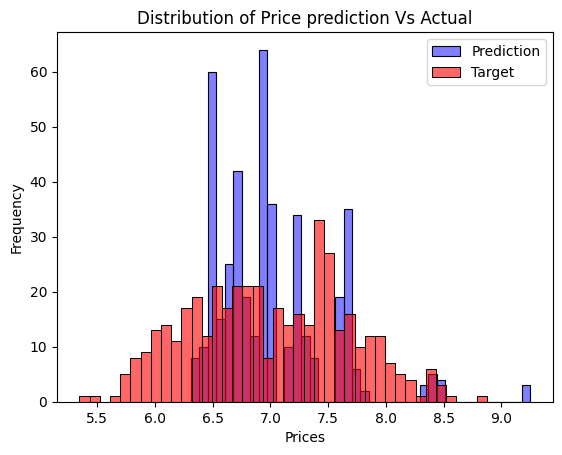

 10%|█         | 1/10 [00:00<00:01,  6.26it/s]


For seed value:1, the rmse score is 0.4204633010913028


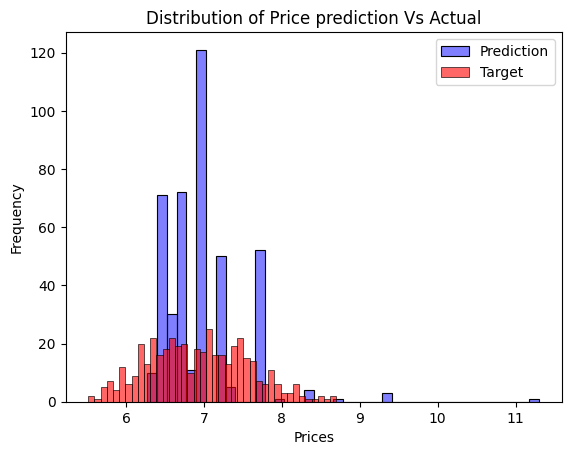

 20%|██        | 2/10 [00:00<00:01,  5.26it/s]


For seed value:2, the rmse score is 0.41729463391495947


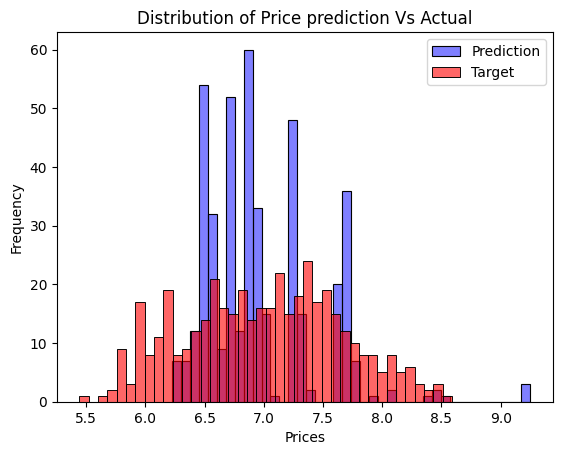

 30%|███       | 3/10 [00:00<00:01,  5.77it/s]


For seed value:3, the rmse score is 0.4554489203776986


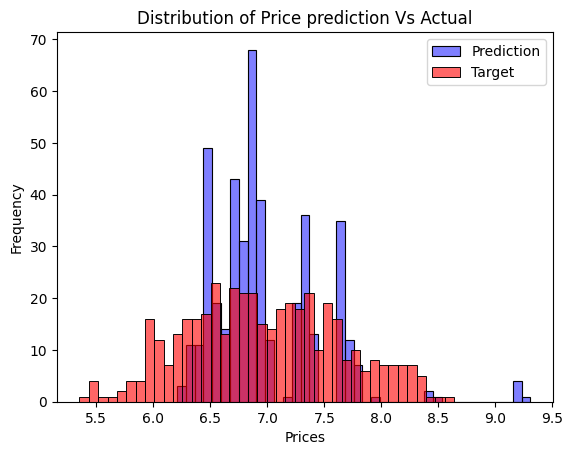

 40%|████      | 4/10 [00:00<00:01,  5.98it/s]


For seed value:4, the rmse score is 0.44420983620386384


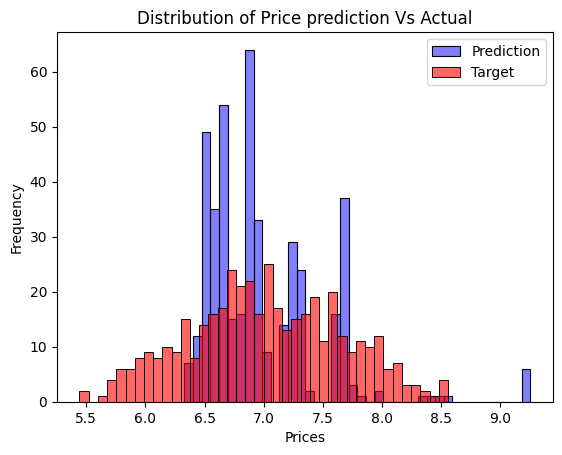

 50%|█████     | 5/10 [00:00<00:00,  6.42it/s]


For seed value:5, the rmse score is 0.4498069877858769


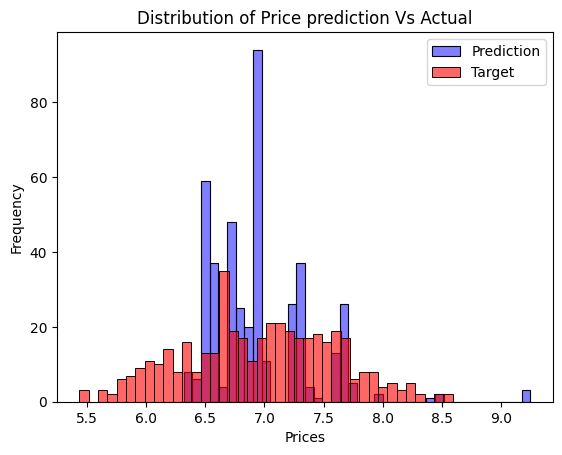

 60%|██████    | 6/10 [00:00<00:00,  6.75it/s]


For seed value:6, the rmse score is 0.44561521792705566


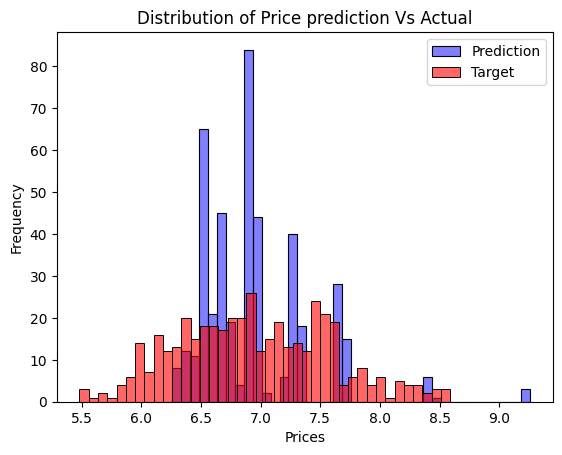

 70%|███████   | 7/10 [00:01<00:00,  6.87it/s]


For seed value:7, the rmse score is 0.4340852382600346


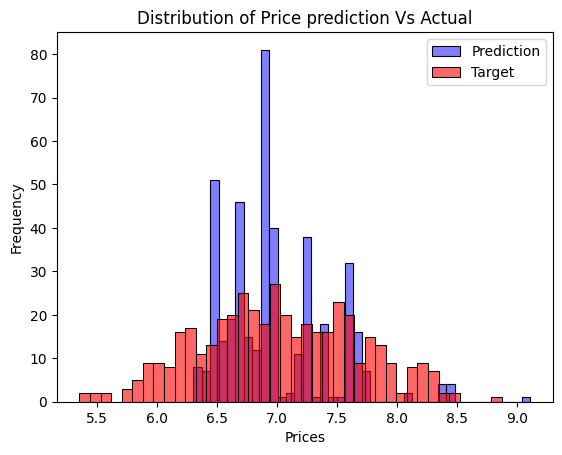

 80%|████████  | 8/10 [00:01<00:00,  6.98it/s]


For seed value:8, the rmse score is 0.43506902154757726


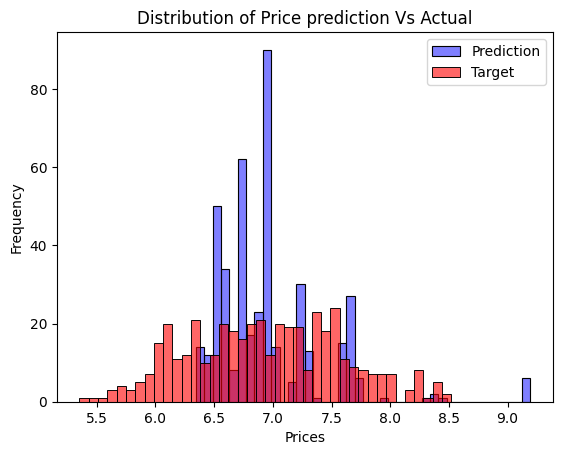

 90%|█████████ | 9/10 [00:01<00:00,  7.13it/s]


For seed value:9, the rmse score is 0.4197999143812454


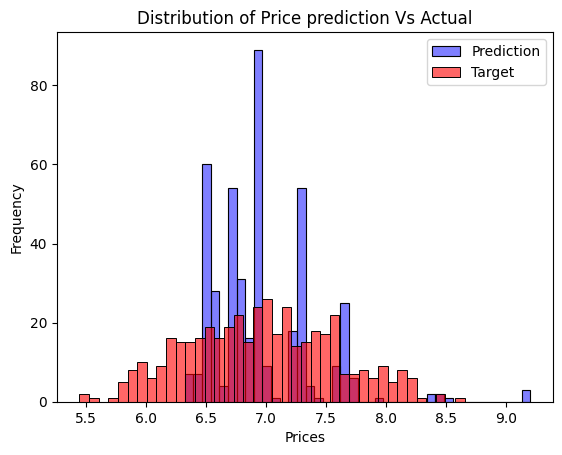

100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


The std value is :0.014


In [48]:
#Question 5
seed_value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_dict = {}
train_rmse = {}

for num in tqdm(seed_value):
    X_features,y_targets = split_process(df2,num)
    df_train_zero_fill = X_features[0].fillna(0).copy()

    X_train = df_train_zero_fill
    w_0, w = train_linear_regression(X_train,y_targets[0])
    y_pred = w_0 + X_train.dot(w)
    train_rmse[num] = rmse(y_targets[0], y_pred)

    X_val = X_features[1].fillna(0).copy()
    y_pred = w_0 + X_val.dot(w)
    eval_rmse = rmse(y_targets[1], y_pred)
    
    rmse_dict[num] = eval_rmse
    print(f'For seed value:{num}, the rmse score is {eval_rmse}')
    prediction_viz(y_pred,y_targets[1],'Prices', 'Distribution of Price prediction Vs Actual')
    print('')


std = round(np.std(list(rmse_dict.values())),3)
print(f'The std value is :{std}')

    



In [76]:
np.std(list(rmse_dict.values()))

0.013868543449797759

In [75]:
np.std(list(train_rmse.values()))

0.007167686849206258

In [74]:
rmse_dict

{0: 0.45510257807019877,
 1: 0.4204633010913028,
 2: 0.41729463391495947,
 3: 0.4554489203776986,
 4: 0.44420983620386384,
 5: 0.4498069877858769,
 6: 0.44561521792705566,
 7: 0.4340852382600346,
 8: 0.43506902154757726,
 9: 0.4197999143812454}

In [66]:
df2.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [69]:
#Question 6
new_df = df2.fillna(0).copy()
np.random.seed = 9
n  = len(new_df)
n_test = int(n * .2)
n_train = n - n_test

#Shuffle dataset

idx = np.arange(n) 
np.random.shuffle(idx)
df_shuffled = new_df.iloc[idx]

df_train = df_shuffled.iloc[:n_train]
    # df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train:].copy()

df_train = df_train.reset_index(drop=True)
# df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.final_price.values)
# y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_test['final_price']

In [72]:
X_test = df_test.copy()
w_0,w = train_linear_regression_reg(df_train,y_train,0.001)
y_pred = w_0 + X_test.dot(w)
test_rmse = rmse(y_test,y_pred)
print(test_rmse)

0.4301878454403181
